# Predicting Employee Productivity Using Tree Models

<p style="text-align:center;">
  <img src="https://images.unsplash.com/photo-1522199670076-2852f80289c3?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=872&q=80" width="800" height="100">
  <br>
  Source: <a href="https://unsplash.com/">Unsplash</a>
</p>


In this project, we will be acquainting ourselves with the remarkable dataset, "Productivity Prediction of Garment Employees," which offers valuable insights into the garment industry's productivity performance. This dataset is a valuable resource, sourced from the prestigious [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees), renowned for its high-quality datasets. Below is a description of the dataset, according to its official summary:

> "*The garment industry is one of the key examples of the industrial globalization of the modern era.
It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.
So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.*"

<p style="text-align:center;">
  <img src="https://s3.amazonaws.com/dq-content/755/garment-factory-unsplash.jpg" width="800" height="100">
  <br>
  Source: <a href="https://www.dataquest.io/">DataQuest</a>
</p>

What makes this dataset particularly fascinating is its versatility, as it can be utilized with both regression and classification algorithms, as stated in the official summary's final sentence:

> "*This dataset can be used for regression purposes by predicting the productivity range (0-1) or for classification purposes by transforming the productivity range (0-1) into different classes.*"

While this dataset's versatility allows us to analyze it using a variety of different methods and techniques, in this project, we will be concentrating on utilizing a classification tree. By focusing on this method, we aim to gain valuable insights into the productivity performance of garment employees and improve our understanding of the garment industry's manufacturing processes.

## Import Libraries and Load Data

To get started, we will import the necessary libraries and load the "Productivity Prediction of Garment Employees" dataset into a DataFrame, enabling us to manipulate and analyze the data effectively.

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
# Load the dataset
df = pd.read_csv('garments_worker_productivity.csv')

# View result
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Dataset Exploration

As with any other dataset, determining what each column is telling us is a fundamental part of the exploration. The following is the dataset's official column information:

- `date`: date in MM-DD-YYYY
- `quarter`: a portion of the month — month was divided into four quarters
- `department`: associated department with the instance
- `day`: day of the week
- `team`: associated team number with the instance
- `targeted_productivity`: targeted productivity set by the authority for each team for each day
- `smv`: standard minute value — the allocated time for a task
- `wip`: work in progress — includes the number of unfinished items for products
- `over_time`: represents the amount of overtime by each team in minutes
- `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
- `idle_time`: the duration of time when the production was interrupted due to several reasons
- `idle_men`: the number of workers who were idle due to production interruption
- `no_of_style_change`: number of changes in the style of a particular product
- `no_of_workers`: number of workers on each team
- `actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

In our next steps, we will explore the columns in the `df` dataset. First, we will identify the type of data included in each column and check for missing or incorrect values. To get a better understanding of each column's distribution, we will calculate the count of observations for each unique value. Then, we will compare relevant columns with each other, such as `targeted_productivity` vs. `actual_productivity`. By analyzing the relationships between these columns, we can gain insights into how the actual productivity relates to the targeted productivity and make data-driven decisions.

To begin, let's obtain the shape of the dataset, where the first value represents the number of observations, and the second value represents the number of columns.

In [215]:
df.shape

(1197, 15)

Next, we will take a closer look at the columns by examining their non-null observation counts and respective data types (dtypes). It's important to keep in mind that in pandas, an "object" dtype indicates that the column's observations are treated as strings or text.

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The output of `df.info()` provides useful information about the dataset, such as the number of entries (in this case, 1197), the total number of columns (15), and the name, count, and data type of each column. It shows that there are 4 columns with an object data type, indicating that the observations of these columns are treated as strings/text. Additionally, it shows that the `wip` column has missing values, as indicated by the difference in the number of non-null counts across columns. This information is crucial to understanding the structure and characteristics of the dataset.

Let's gather some general statistics on the numerical columns. It's important to keep in mind that std refers to Standard Deviation, while the percentiles represent the range in which a certain percentage of the data falls. The minimum and maximum values of each column are also displayed, which can be helpful in identifying any outliers present in the dataset.

In [217]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


From the summary statistics table, we can observe the following:

- `team`: The average team number is 6.4, with a minimum of 1 and a maximum of 12.
- `targeted_productivity`: The mean targeted productivity is 0.73, with a minimum of 0.07 and a maximum of 0.8.
- `smv`: The average standard minute value is 15.06, with a minimum of 2.9 and a maximum of 54.56.
- `wip`: The average work in progress is 1190.47, with a minimum of 7 and a maximum of 23122.
- `over_time`: The average overtime is 4567.46, with a minimum of 0 and a maximum of 25920.
- `incentive`: The average incentive is 38.21, with a minimum of 0 and a maximum of 3600.
- `idle_time`: The average idle time is 0.73, with a minimum of 0 and a maximum of 300.
- `idle_men`: The average number of idle men is 0.37, with a minimum of 0 and a maximum of 45.
- `no_of_style_change`: The average number of style changes is 0.15, with a minimum of 0 and a maximum of 2.
- `no_of_workers`: The average number of workers is 34.61, with a minimum of 2 and a maximum of 89.
- `actual_productivity`: The average actual productivity is 0.74, with a minimum of 0.23 and a maximum of 1.12.

By examining the table, we can discover several interesting facts about the dataset. For example:

- There are missing values in the `wip` column, as the count for that column is only 691 instead of 1197.
- There are some columns such as `wip`, `over_time`, `incentive`, `idle_time`, `idle_men`, and `no_of_workers` with a maximum value that is much higher than the 75th percentile, indicating the presence of outliers in the dataset.
- The range of values for each column varies widely, indicating the need for scaling or normalization as we plan to use these features to build our model.

We see that the targeted productivity has a relatively small range, suggesting that there may be strict targets for productivity that the factory is trying to meet. The average overtime is quite high, which may indicate that the factory is having trouble meeting its production targets within regular working hours. The number of workers ranges from 2 to 89, suggesting that there may be some variability in the workforce size depending on production needs.

The statistics related to idle time and idle men are particularly interesting, as they suggest that there may be some issues with productivity in the factory. The fact that the average idle time is relatively low, but there is still a maximum of 300 minutes of idle time, suggests that there may be some production stoppages or other issues that are causing lost time. Similarly, the fact that there is a maximum of 45 idle men suggests that there may be some inefficiencies in the workforce or production process.

Thus far, we have analyzed the relationships between columns in our dataset. However, we must now take a closer look at each column independently. Our first step is to determine the data type included in each column and check for any missing or incorrect values. After identifying and addressing any issues, we will compute the count of observations for each unique value to gain a better understanding of the distribution of each column. Additionally, we will compare relevant columns, such as targeted_productivity vs. actual_productivity, to explore how the actual productivity relates to the targeted productivity. By examining these relationships, we can gather valuable insights and make data-driven decisions.

### Find Data Types

`df.dtypes` is a useful attribute in pandas that displays the data type of each column in a DataFrame.

In [218]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

The `df.dtypes` output shows the data type of each column in the `df` dataframe. The columns `date`, `quarter`, `department`, and `day` are of object type, which typically indicates they contain string values. The columns `targeted_productivity`, `smv`, `wip`, `idle_time`, `no_of_workers`, and `actual_productivity` are of float type, meaning they contain decimal values. The columns `team`, `over_time`, `incentive`, `idle_men`, and `no_of_style_change` are of integer type.

### Find Missing Values

Next, we will determine if there are any missing values in any of these columns.

In [219]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

As we mentioned earlier, the column `wip` has 506 missing values, while all other columns seem to have complete data with no missing values.

### Calculate Unique Values

Next, we will calculate the count of observations for each unique value within each column.

In [220]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [221]:
# Calculate frequency distribution every column in the data
for col in df.columns:
    print(f'--- Unique values for {col} ---')
    display(df[col].value_counts())
    print()

--- Unique values for date ---


3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: date, dtype: int64


--- Unique values for quarter ---


Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64


--- Unique values for department ---


sweing        691
finishing     257
finishing     249
Name: department, dtype: int64


--- Unique values for day ---


Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64


--- Unique values for team ---


8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64


--- Unique values for targeted_productivity ---


0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64


--- Unique values for smv ---


3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: smv, Length: 70, dtype: int64


--- Unique values for wip ---


1039.0    5
1282.0    4
1263.0    3
1216.0    3
1069.0    3
         ..
1635.0    1
1519.0    1
1337.0    1
1118.0    1
914.0     1
Name: wip, Length: 548, dtype: int64


--- Unique values for over_time ---


960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: over_time, Length: 143, dtype: int64


--- Unique values for incentive ---


0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: incentive, dtype: int64


--- Unique values for idle_time ---


0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64


--- Unique values for idle_men ---


0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64


--- Unique values for no_of_style_change ---


0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64


--- Unique values for no_of_workers ---


8.0     262
58.0    114
57.0    109
59.0     75
10.0     60
       ... 
51.5      1
28.0      1
21.0      1
4.0       1
6.0       1
Name: no_of_workers, Length: 61, dtype: int64


--- Unique values for actual_productivity ---


0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: actual_productivity, Length: 879, dtype: int64

Looking at the count distribution, we notice that some columns have unexpected representations, such as `quarter`, `department`, and `day`. We will investigate these columns further to determine the cause of the inconsistency.

#### Checking "quarter"

The column title `quarter` may cause some confusion since it typically refers to a part of a year, but in this case, it represents a part of a month. To gain a better understanding of the distribution of data in this column, let's use the `value_counts()` method again and see the number of observations per week.

In [222]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

Interestingly, there are 44 observations classified as "Quarter 5", which draws our attention. Now, let's explore these observations in detail and see if we can reveal any significant findings.

In [223]:
# Extract values of 'Quarter5'
df[df['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


We can observe that the "Quarter 5" classification is always associated with the `29th` and `31st` in the `date` column. This explains why we have 5 quarters instead of the usual 4 for the month of January.

#### Checking "department"

Let's now shift our focus to the `department` column, which indicates the department associated with each instance.

In [224]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

The `department` column seems to have an issue - it has two distinct "finishing" values. Such occurrences are usually caused by whitespace in the observation content. To investigate this, we can use the `unique()` method to get all unique values of a column:

In [225]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

We observe that the 'finishing' value appears twice in this column, with one instance having a trailing space. This is a common issue caused by extra whitespace in the data. We will address this during the data cleaning step.

#### Checking "day"

This column indicates the weekdays when the industry operates.

In [226]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

The absence of Friday observations doesn't necessarily imply missing data, as it's possible that the factory is closed on Fridays. Additionally, the `day` column supports the idea of `quarter` column that "Quarter 5" comprises observations on January 29th (Thrusday) and 31st (Saturday) of 2015, as confirmed by the [2015 calender](https://www.dayoftheweek.org/calendar/2015). Keeping track of such discoveries is crucial for future analysis.

## Dataset Cleaning

After a general exploration of every column, we need to perform data cleaning to prepare our dataset for further analysis, keeping in mind the following objectives:

- Correct any incorrect observations present in the columns.
- Determine the number of missing values in each column and consider ways to work around them, such as transforming other columns or dropping the column entirely.
- Evaluate if the data type of each column is appropriate for fitting a decision tree model. If not, we need to explore options for transforming the values.
- Is there a chance that we could create a new and useful column based on the combined information of two other columns?
- Decide which columns we will keep to fit the decision tree algorithm.
- Would changing the column order in the dataset improve its readability?


To achieve these objectives, we will use `pandas` functions and methods for data cleaning.

### Dealing with Incorrect Observations

To start, we can focus on addressing any incorrect observations present in the `department` column.

In [227]:
# Make copy of the dataframe
df_clean = df.copy()

# Check unique values of 'department'
df_clean['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

The trailing whitespace in the `department` column is causing two different values for "finishing". We can address this issue by using the `str.strip()` function to remove the whitespace.

In [228]:
df_clean['department'] = df_clean['department'].str.strip()

# View results
df_clean['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

The cumulative number of "finishing" observations is now 506.

The `quarter` column contains weekly information for a duration of 4 weeks, but it is unclear why January has 5 quarters, which is not common for other months. To address this issue, we can merge the "quarter5" values with the "quarter4" ones. This is because we will be creating "dummies" for the `quarter` column, and "quarter5" only has 44 observations, covering only two days (January 29th and 31st). Generating a whole column for such a small number of observations may not be necessary.

In [229]:
# Count distribution before replacing values in 'quarter' column
df_clean['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [230]:
# Replace 'Quarter5' with 'Quarter4'
df_clean['quarter'] = df_clean['quarter'].str.replace('Quarter5', 'Quarter4')

# View results
df_clean['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

After merging the 44 observations from "Quarter5" into "Quarter4", the result now has a total of 248 observations for "Quarter4".

### Headling Missing Values

We only have missing values in the `wip` column of the dataset. To further investigate, we can calculate the percentage of missing values in this column.

In [231]:
# Calculate percentage of NaNs in 'wip'
df_clean['wip'].isna().mean()*100

42.272347535505425

Approximately 42% of the values in the `wip` column are missing, which is a significant portion of the data. We cannot be certain of the reason for these missing values, and it is possible that they were intentionally left blank. Therefore, replacing missing values with generic methods such as mean or mode may not be appropriate.

Hence, we have decided to eliminate the `wip` column. This is because it contains a substantial number of missing observations, and it's unclear whether an empty cell represents zero unfinished products or missing data. Given this ambiguity, it's best to remove this column altogether.

In [232]:
# Drop 'wip' column
df_clean.drop('wip', axis=1, inplace=True)

# View results
'wip' in df_clean.columns

False

### Evaluating Columns Dtype

There seems to be some inconsistency in the data type of some columns in the dataset. For instance, the `date` column is currently represented as an "object" data type instead of "datetime". We'll transform it using the `to_datetime()` method.

In [233]:
# Recall the data types of all columns
df_clean.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [234]:
# Convert 'object' data type to 'datetime'
df_clean['date'] = pd.to_datetime(df_clean['date'])

# View result
df_clean['date'].dtype

dtype('<M8[ns]')

Now that we have converted the `date` column data type, let's turn our attention to the `no_of_workers` column. Currently, this column contains floating point values, which should be integers as we cannot have a fractional number of workers. We should fix this by converting the column data type to integer.

In [235]:
df_clean['no_of_workers'] = df_clean['no_of_workers'].astype('int64')

Lastly, based on the description, `over_time` and `incentive` columns appear to have a float data type since it represents the amount of overtime in minutes and amount of financial incentive respectively, which can have decimal values.

In [236]:
df_clean['over_time'] = df_clean['over_time'].astype(float)
df_clean['incentive'] = df_clean['incentive'].astype(float)

# View results
df_clean.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,7080.0,98.0,0.0,0,0,59,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,960.0,0.0,0.0,0,0,8,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,3660.0,50.0,0.0,0,0,30,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,3660.0,50.0,0.0,0,0,30,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1920.0,50.0,0.0,0,0,56,0.800382


### Creating the Derived Columns

The next step is to extract the month, day of the week, and year from the `date` column and create a new column: `month`. This will help us to analyze how the performance metrics in the dataset vary across different months. By doing this, we may be able to identify patterns or trends in the data that can help us to make more informed decisions. For example, we may observe that productivity is consistently higher on certain days of the week, or that there is a seasonal pattern in the data. This information could be used to improve operations and increase efficiency.

In [237]:
# Create new column 'month' from 'date'
df_clean['month'] = df_clean['date'].dt.month

# View results
df_clean.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,7080.0,98.0,0.0,0,0,59,0.940725,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,960.0,0.0,0.0,0,0,8,0.886500,1
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,3660.0,50.0,0.0,0,0,30,0.800570,1
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,3660.0,50.0,0.0,0,0,30,0.800570,1
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1920.0,50.0,0.0,0,0,56,0.800382,1


To build a decision tree for classification instead of regression, we need to convert our target variable `actual_productivity` from a numerical variable to a categorical one. This can be done by creating a new column called `productive`, which will have Boolean values indicating whether the productivity targets were met for each observation in the dataset. However, it's important to note that before creating this column, we need to round the float values in `actual_productivity` to two decimal places, similar to `targeted_productivity`.

In [238]:
# Round values to two decimal values
df_clean['actual_productivity'] = df_clean['actual_productivity'].round(2)
df_clean['actual_productivity']

0       0.94
1       0.89
2       0.80
3       0.80
4       0.80
        ... 
1192    0.63
1193    0.63
1194    0.63
1195    0.51
1196    0.39
Name: actual_productivity, Length: 1197, dtype: float64

In [239]:
# Create bool column 'productive' when 'actual_productivity' is greater or equal to 'targeted_productivity'
df_clean['productive'] = df_clean['actual_productivity'] >= df_clean['targeted_productivity']
df_clean.sample(10, random_state=42)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,productive
921,2015-02-24,Quarter4,sweing,Tuesday,1,0.60,22.53,5040.0,0.0,0.0,0,1,42,0.27,2,False
321,2015-01-19,Quarter3,sweing,Monday,6,0.80,11.41,4380.0,50.0,0.0,0,0,31,0.80,1,True
101,2015-01-06,Quarter1,finishing,Tuesday,8,0.80,2.90,1440.0,0.0,0.0,0,0,8,0.68,1,False
920,2015-02-24,Quarter4,finishing,Tuesday,2,0.70,3.90,960.0,0.0,0.0,0,0,8,0.32,2,False
58,2015-01-04,Quarter1,finishing,Sunday,7,0.80,2.90,960.0,0.0,0.0,0,0,8,0.67,1,False
790,2015-02-16,Quarter3,sweing,Monday,5,0.80,30.10,0.0,0.0,0.0,0,0,59,0.80,2,True
948,2015-02-26,Quarter4,finishing,Thursday,1,0.50,3.94,3360.0,0.0,0.0,0,0,8,0.77,2,True
969,2015-02-28,Quarter4,finishing,Saturday,1,0.50,3.94,3360.0,0.0,0.0,0,0,8,0.77,2,True
410,2015-01-24,Quarter4,sweing,Saturday,7,0.65,22.52,10170.0,26.0,0.0,0,0,56,0.65,1,True
1079,2015-03-05,Quarter1,sweing,Thursday,9,0.75,18.79,6240.0,45.0,0.0,0,0,52,0.75,3,True


### Drop Unnecessary Columns

Based on our initial data exploration, we will now proceed to remove the columns that are deemed not useful for our analysis.

As for the `date` column, although it provides information about the observation period from January 1, 2015 to March 11, 2015, due to its short period, we'll drop the column as it may not provide enough predictive power. However, if the column included observations for all twelve months of the year, it could have helped to detect seasonal patterns such as decreased productivity during the winter season and provided more predictive power.

In [240]:
df_clean.drop('date', axis=1, inplace=True)

'date' in df_clean.columns

False

We have decided to drop the `idle_time` and `idle_men` columns from our dataset since they only contain non-zero values in a small number of observations (18), making them fairly uniform columns with limited information to offer.

In [241]:
df_clean.drop(['idle_time', 'idle_men'], axis=1, inplace=True)

Finally, we will remove the `no_of_style_change` column, as it contains only 147 observations with minimal changes (1 or 2). Therefore, it does not provide substantial information and can be dropped from the dataset.

In [242]:
df_clean.drop('no_of_style_change', axis=1, inplace=True)

By this point, we have eliminated several columns from our dataset. Now, let's examine the remaining columns.

In [243]:
df_clean.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'month', 'productive'],
      dtype='object')

### Dataset Column Order

To conclude data cleaning, we'll reorganize columns for readability.

In [244]:
# Rearrange columns
df_clean = df_clean[['quarter', 'day', 'department', 'team', 'no_of_workers', 'over_time',
                     'smv', 'incentive', 'targeted_productivity', 'actual_productivity', 'productive']]

# View results
df_clean.head()

,quarter,day,department,team,no_of_workers,over_time,smv,incentive,targeted_productivity,actual_productivity,productive
0,Quarter1,Thursday,sweing,8,59,7080.0,26.16,98.0,0.80,0.94,True
1,Quarter1,Thursday,finishing,1,8,960.0,3.94,0.0,0.75,0.89,True
2,Quarter1,Thursday,sweing,11,30,3660.0,11.41,50.0,0.80,0.80,True
3,Quarter1,Thursday,sweing,12,30,3660.0,11.41,50.0,0.80,0.80,True
4,Quarter1,Thursday,sweing,6,56,1920.0,25.90,50.0,0.80,0.80,True


## Exploratory Data Analysis

After cleaning the data and creating the target column, we need to explore and understand each column to determine their relevance for the classification problem. This will involve using various visualization techniques to identify patterns and correlations that can help in feature selection and modeling.

### Continuous Variables

To understand the continuous variables better, we can start by calculating the distribution and also creating histograms to visualize them.

In [245]:
# List of continuous columns
cont_cols = ['over_time', 'smv', 'incentive', 'targeted_productivity', 'actual_productivity']

for col in cont_cols:
    print(col)
    display(df_clean[col].value_counts(bins=20))
    print()

over_time


(-25.921000000000003, 1296.0]    252
(6480.0, 7776.0]                 243
(1296.0, 2592.0]                 223
(2592.0, 3888.0]                 106
(5184.0, 6480.0]                 106
(9072.0, 10368.0]                102
(3888.0, 5184.0]                  93
(10368.0, 11664.0]                51
(7776.0, 9072.0]                  12
(14256.0, 15552.0]                 4
(11664.0, 12960.0]                 3
(12960.0, 14256.0]                 1
(24624.0, 25920.0]                 1
(15552.0, 16848.0]                 0
(16848.0, 18144.0]                 0
(18144.0, 19440.0]                 0
(19440.0, 20736.0]                 0
(20736.0, 22032.0]                 0
(22032.0, 23328.0]                 0
(23328.0, 24624.0]                 0
Name: over_time, dtype: int64


smv


(2.847, 5.483]      506
(20.981, 23.564]    162
(28.73, 31.313]     140
(26.147, 28.73]      95
(18.398, 20.981]     90
(10.649, 13.232]     65
(13.232, 15.815]     59
(23.564, 26.147]     48
(15.815, 18.398]      7
(8.066, 10.649]       6
(46.811, 49.394]      5
(41.645, 44.228]      4
(49.394, 51.977]      4
(39.062, 41.645]      2
(44.228, 46.811]      1
(31.313, 33.896]      1
(36.479, 39.062]      1
(51.977, 54.56]       1
(33.896, 36.479]      0
(5.483, 8.066]        0
Name: smv, dtype: int64


incentive


(-3.601, 180.0]     1187
(900.0, 1080.0]        6
(2700.0, 2880.0]       1
(1260.0, 1440.0]       1
(1080.0, 1260.0]       1
(3420.0, 3600.0]       1
(720.0, 900.0]         0
(540.0, 720.0]         0
(1440.0, 1620.0]       0
(1620.0, 1800.0]       0
(180.0, 360.0]         0
(1980.0, 2160.0]       0
(2160.0, 2340.0]       0
(2340.0, 2520.0]       0
(2520.0, 2700.0]       0
(360.0, 540.0]         0
(2880.0, 3060.0]       0
(3060.0, 3240.0]       0
(3240.0, 3420.0]       0
(1800.0, 1980.0]       0
Name: incentive, dtype: int64


targeted_productivity


(0.764, 0.8]       540
(0.69, 0.727]      242
(0.727, 0.764]     216
(0.617, 0.654]      63
(0.581, 0.617]      57
(0.472, 0.508]      49
(0.326, 0.362]      27
(0.398, 0.435]       2
(0.0683, 0.107]      1
(0.362, 0.398]       0
(0.107, 0.143]       0
(0.289, 0.326]       0
(0.508, 0.544]       0
(0.544, 0.581]       0
(0.252, 0.289]       0
(0.216, 0.252]       0
(0.654, 0.69]        0
(0.18, 0.216]        0
(0.143, 0.18]        0
(0.435, 0.472]       0
Name: targeted_productivity, dtype: int64


actual_productivity


(0.764, 0.808]    229
(0.72, 0.764]     132
(0.675, 0.72]     122
(0.808, 0.853]    111
(0.898, 0.942]     96
(0.586, 0.631]     73
(0.631, 0.675]     63
(0.942, 0.986]     61
(0.853, 0.898]     55
(0.986, 1.031]     45
(0.497, 0.542]     45
(0.319, 0.364]     30
(0.542, 0.586]     30
(0.408, 0.452]     28
(0.364, 0.408]     20
(0.228, 0.274]     19
(0.274, 0.319]     15
(0.452, 0.497]     15
(1.031, 1.076]      4
(1.076, 1.12]       4
Name: actual_productivity, dtype: int64

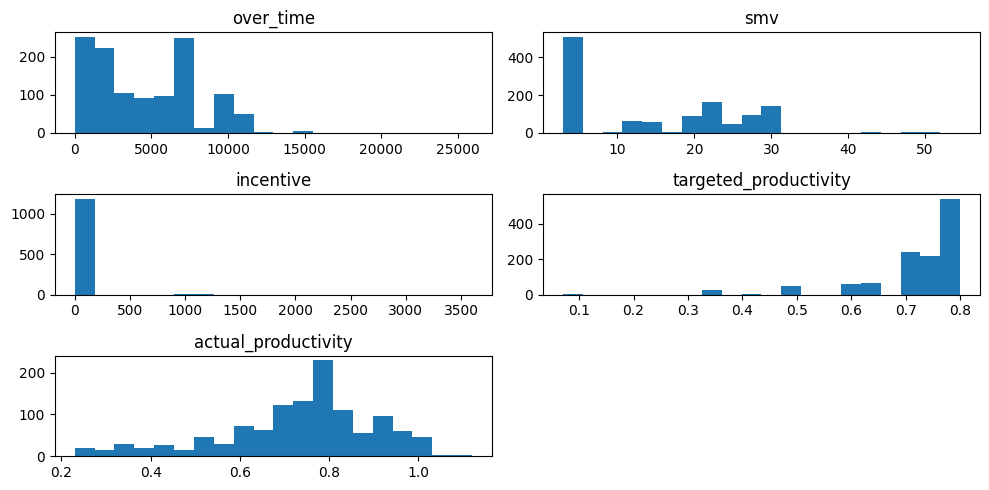

In [246]:
# Define number of rows and columns
num_rows = 3
num_cols = 2

# Define figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 5))

# Create histograms
for i, col in enumerate(cont_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols    
    ax = axes[row_idx, col_idx]
    ax.hist(df_clean[col], bins=20)
    ax.set_title(col)
    
# Remove any unused axes
for j in range(len(cont_cols), len(axes.flat)):
    fig.delaxes(axes.flat[j])
    
    
fig.tight_layout()
plt.show()

Based on the histograms, we can make the following observations:

- `over_time`: The highest frequency is in the range of (-25.921000000000003, 1296.0] with 252 counts, which means that most of the workers have worked overtime for up to 1296 minutes. The other ranges show lower frequencies, indicating that there were fewer workers who worked overtime for longer durations. The last six ranges have no counts, suggesting that none of the workers worked overtime for durations beyond those ranges.
- `smv`: The highest frequency is in the range of (2.847, 5.483] with 506 counts, which means that most of the workers had an SMV score in this range. The other ranges show lower frequencies, indicating that there were fewer workers with SMV scores outside this range. The last two ranges have no counts, suggesting that none of the workers had an SMV score outside those ranges.
- `incentive`: The majority of the data falls in the range of -3.601 to 180, with a total of 1187 observations, indicating that most incentives are small in value. There are only a few observations above this range, indicating that high-value incentives are relatively rare in the data.
- `targeted_productivity`: The highest frequency is in the range of (0.764, 0.8] with 540 counts, which means that most of the workers achieved a targeted productivity score within this range. The other ranges show lower frequencies, indicating that there were fewer workers who achieved productivity scores outside this range. The last two ranges have no counts, suggesting that none of the workers achieved productivity scores outside those ranges.
- `actual_productivity`: The highest frequency is in the range of (0.764, 0.808] with 229 counts, which means that most of the workers achieved an actual productivity score within this range. The other ranges show lower frequencies, indicating that there were fewer workers who achieved productivity scores outside this range. The last six ranges have increasingly lower frequencies, suggesting that fewer workers achieved higher productivity scores beyond the (0.764, 0.808] range.

### Discrete Variables

Now that we have examined the continuous variables, it's time to delve into the discrete variables in more detail.

In [247]:
# List of discrete columns
dis_cols = ['team', 'no_of_workers']

for col in dis_cols:
    print(col)
    print(df_clean[col].value_counts())
    print()

team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

no_of_workers
8     262
58    135
57    134
56    103
59     80
10     60
34     43
9      42
12     37
15     37
55     27
33     24
52     22
31     21
54     19
20     16
18     16
50     10
53      9
51      9
30      9
32      8
60      7
25      6
2       6
35      6
45      6
19      4
38      4
5       3
17      3
7       3
14      2
46      2
39      2
42      2
22      2
27      2
49      1
24      1
48      1
47      1
28      1
44      1
26      1
11      1
21      1
4       1
89      1
16      1
29      1
6       1
Name: no_of_workers, dtype: int64



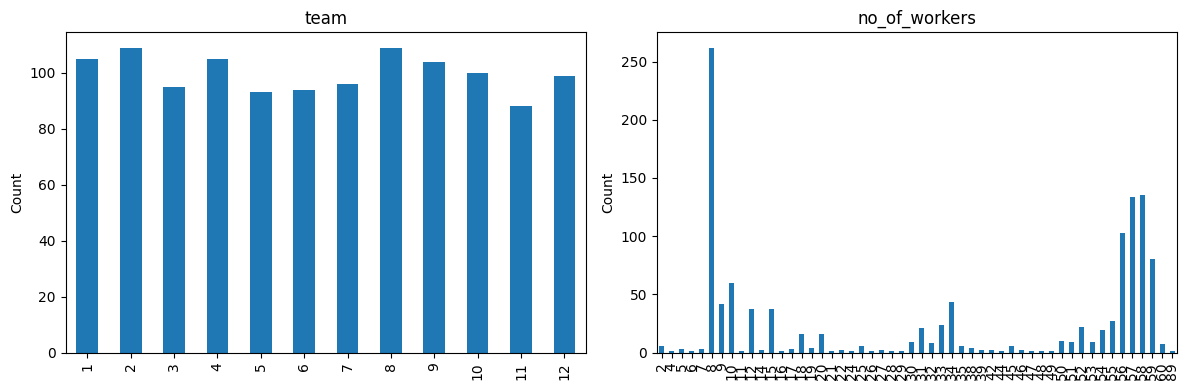

In [248]:
# Create a figure with the desired size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Flatten the axes into a 1D array
axes = axes.flatten()

# Loop through each discrete column and create a bar plot on the corresponding axis
for i, col in enumerate(dis_cols):
    df_clean[col].value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

    
plt.tight_layout()
plt.show()

Observations for bar plots on discrete variables:

- `team`: Teams 8 and 2 have the highest number of observations with 109 each, followed by team 1 with 105 observations. Team 11 has the lowest number of observations with 88.
- `no_of_workers`: The number of workers varies greatly, with the highest number of observations for 8 workers (262 observations), followed by 58 and 57 workers (135 and 134 observations, respectively). There are many different numbers of workers with only a few observations each.


### Categorical Variables

Let's now shift our focus to the categorical columns.

In [249]:
# List of categorical columns (including target column 'productive')
cat_cols = ['quarter', 'department', 'day', 'productive']

for col in cat_cols:
    print(col)
    print(df_clean[col].value_counts())
    print()

quarter
Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

department
sweing       691
finishing    506
Name: department, dtype: int64

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

productive
True     895
False    302
Name: productive, dtype: int64



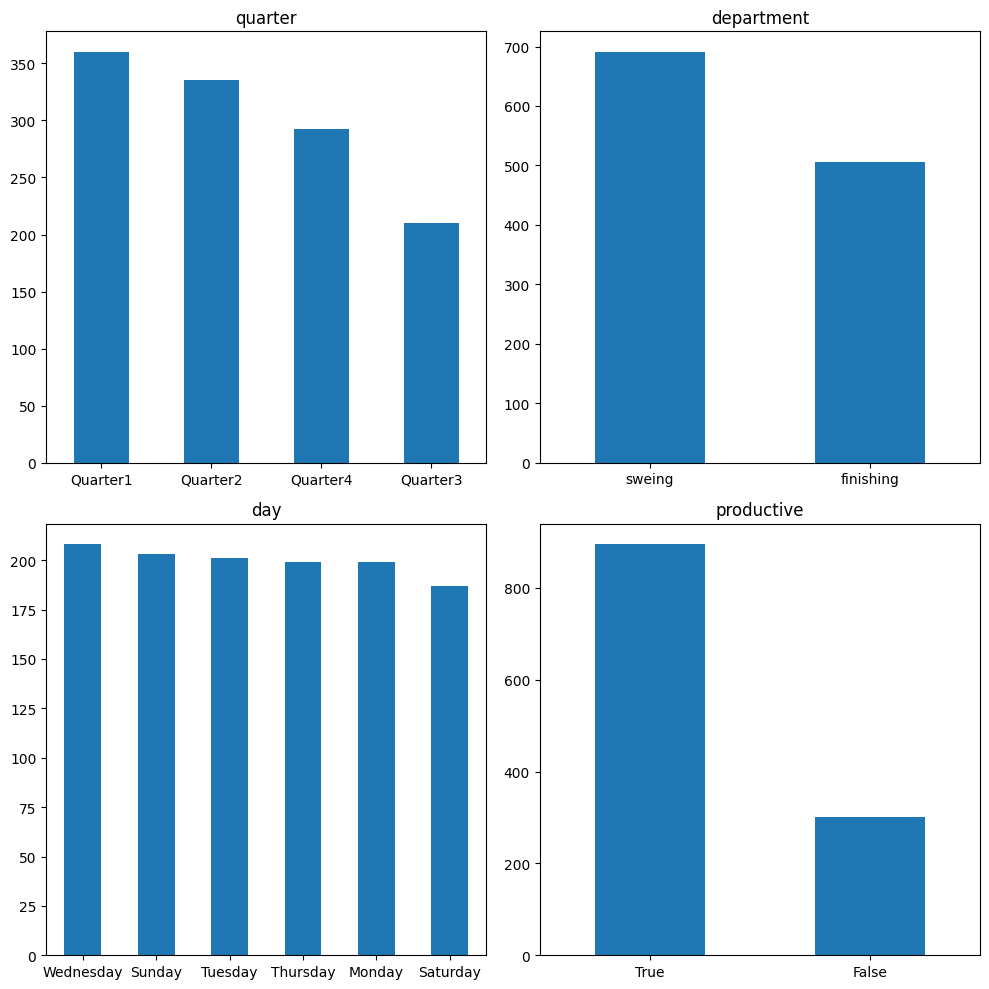

In [250]:
# Create bar plot for 'cat_cols'
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    df_clean[col].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', labelrotation=0)

plt.tight_layout()
plt.show()

Based on the bar plots, we can make the following observations:

- `Quarter`: The maximum number of records are from Quarter1, followed by Quarter2, Quarter4, and Quarter3.
- `Department`: The number of records from the Sewing department is higher than that of the Finishing department.
- `Day`: The number of records is almost evenly distributed across all days of the week, with Wednesday having the maximum records and Saturday having the least.
- `Productive`: The majority of records indicate that the factory was productive (895 records), while a relatively smaller number of records indicate non-productivity (302 records).

## Columns Relationship


In [251]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   day                    1197 non-null   object 
 2   department             1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   no_of_workers          1197 non-null   int64  
 5   over_time              1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   incentive              1197 non-null   float64
 8   targeted_productivity  1197 non-null   float64
 9   actual_productivity    1197 non-null   float64
 10  productive             1197 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 94.8+ KB


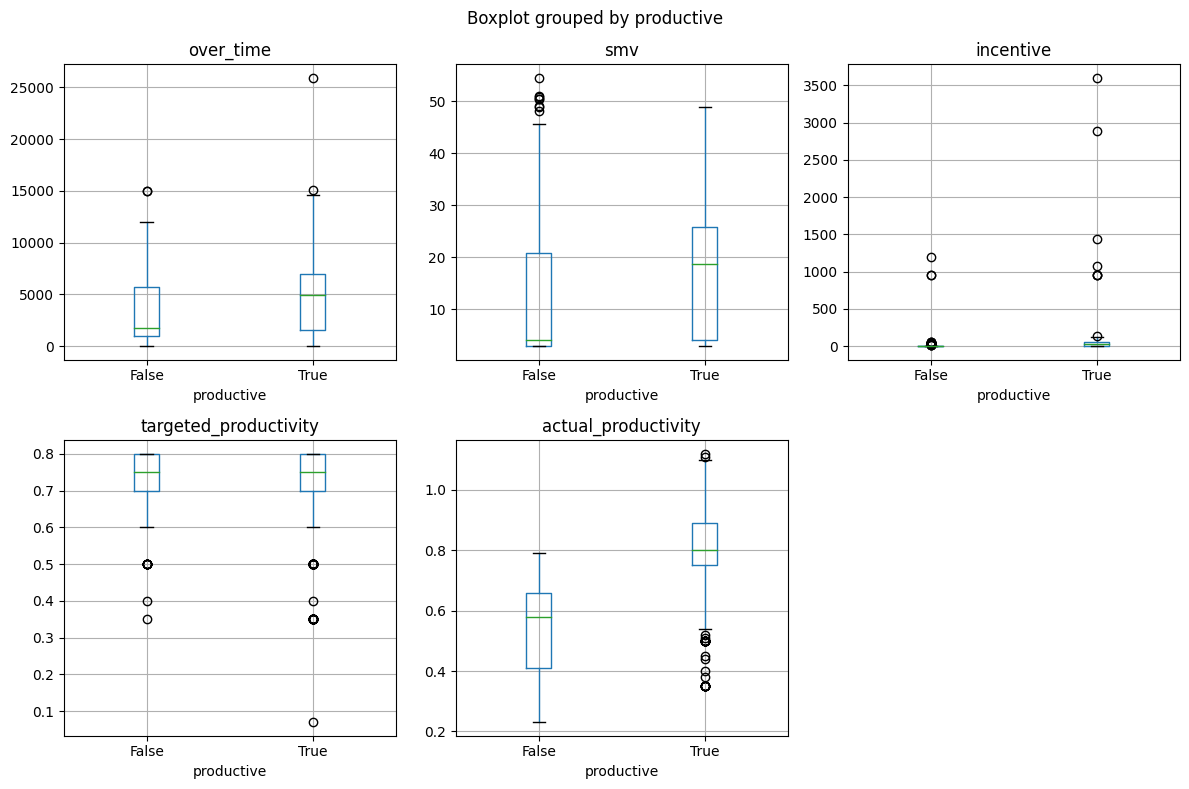

In [252]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Loop through each continuous column and create a boxplot on the corresponding axis
for i, col in enumerate(cont_cols):
    # create boxplot for each class in the target variable
    df_clean.boxplot(column=col, by='productive', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    
# Remove unused axes
for j in range(len(cont_cols), len(axes.flat)):
    fig.delaxes(axes.flat[j])
    
    
plt.tight_layout()
plt.show()

In [253]:
# for observations of continuous variables with 'productive'
for col in cont_cols:
    display(df_clean.groupby('productive')[col].describe())

,count,mean,std,min,25%,50%,75%,max
productive,,,,,,,,
False,302.0,3317.682119,2890.710507,0.0,960.0,1800.0,5692.5,15000.0
True,895.0,4989.173184,3388.787661,0.0,1590.0,4950.0,6960.0,25920.0


,count,mean,std,min,25%,50%,75%,max
productive,,,,,,,,
False,302.0,11.673046,12.561706,2.9,2.90,4.15,20.79,54.56
True,895.0,16.205765,10.094065,2.9,4.15,18.79,25.90,48.84


,count,mean,std,min,25%,50%,75%,max
productive,,,,,,,,
False,302.0,14.139073,104.187924,0.0,0.0,0.0,0.0,1200.0
True,895.0,46.332961,174.383262,0.0,0.0,35.0,54.0,3600.0


,count,mean,std,min,25%,50%,75%,max
productive,,,,,,,,
False,302.0,0.732616,0.079580,0.35,0.7,0.75,0.8,0.8
True,895.0,0.728626,0.103361,0.07,0.7,0.75,0.8,0.8


,count,mean,std,min,25%,50%,75%,max
productive,,,,,,,,
False,302.0,0.536490,0.149656,0.23,0.41,0.58,0.66,0.79
True,895.0,0.801978,0.123878,0.35,0.75,0.80,0.89,1.12


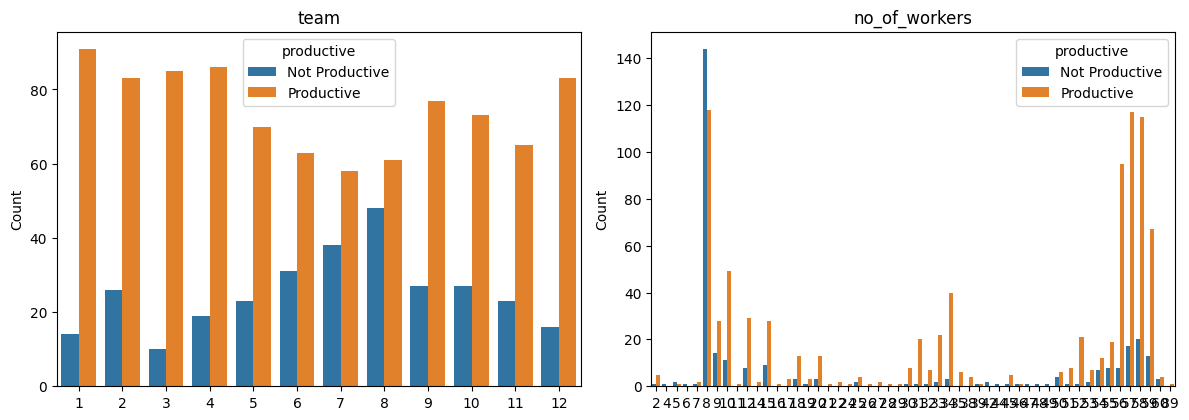

In [262]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes into a 1D array
axes = axes.flatten()

# Loop through each discrete column and create a countplot on the corresponding axis
for i, col in enumerate(dis_cols):
    sns.countplot(x=col, hue='productive', data=df_clean, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='productive', labels=['Not Productive', 'Productive'])
    
# Remove any unused axes
for j in range(len(dis_cols), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


In [263]:
# for observation of discrete variables
for col in dis_cols:
    display(df_clean.groupby(['productive', col]).size())

productive  team
False       1       14
            2       26
            3       10
            4       19
            5       23
            6       31
            7       38
            8       48
            9       27
            10      27
            11      23
            12      16
True        1       91
            2       83
            3       85
            4       86
            5       70
            6       63
            7       58
            8       61
            9       77
            10      73
            11      65
            12      83
dtype: int64

productive  no_of_workers
False       2                  1
            4                  1
            5                  2
            6                  1
            7                  1
                            ... 
True        57               117
            58               115
            59                67
            60                 4
            89                 1
Length: 83, dtype: int64

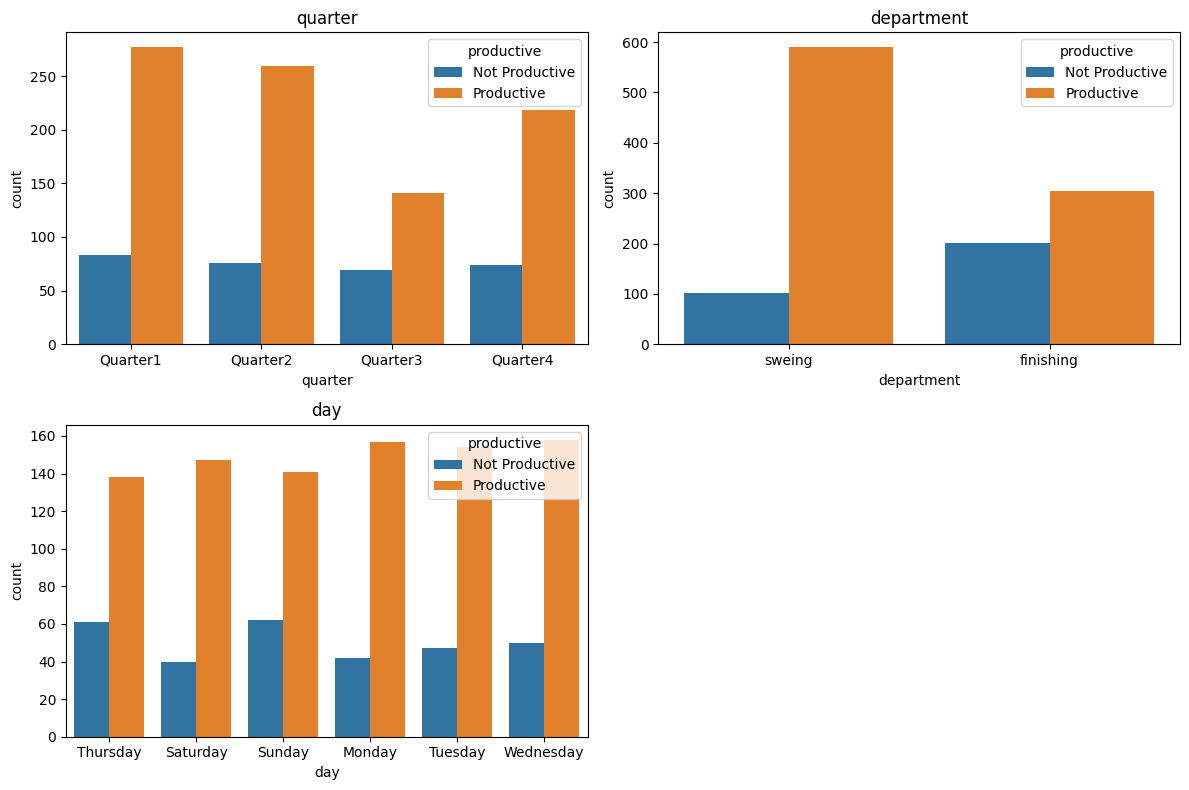

In [260]:
# Remove 'productive' from the 'cat_cols' list
cat_cols = cat_cols[:-1]

# Create a figure with the desired size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes into a 1D array
axes = axes.flatten()

# Loop over each categorical column and create a count plot on the corresponding axis
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='productive', data=df_clean, ax=axes[i])
    axes[i].set_title(col)
    axes[i].legend(title='productive', labels=['Not Productive', 'Productive'])

# Remove any unused axes
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

    
fig.tight_layout()
plt.show()

In [50]:
# for observation of categorical variables
for col in cat_cols:
    display(df_clean.groupby(['productive', col]).size())

productive  quarter 
False       Quarter1     83
            Quarter2     76
            Quarter3     69
            Quarter4     74
True        Quarter1    277
            Quarter2    259
            Quarter3    141
            Quarter4    218
dtype: int64

productive  day      
False       Monday        42
            Saturday      40
            Sunday        62
            Thursday      61
            Tuesday       47
            Wednesday     50
True        Monday       157
            Saturday     147
            Sunday       141
            Thursday     138
            Tuesday      154
            Wednesday    158
dtype: int64

productive  department
False       finishing     201
            sweing        101
True        finishing     305
            sweing        590
dtype: int64